* Competition link https://www.kaggle.com/c/house-prices-advanced-regression-techniques
* Useful reference https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

In [17]:
import helpers as helpers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
ls

README.md                       data/
Robin kaggle house price.ipynb  helpers.py
__pycache__/


In [3]:
housing = pd.DataFrame.from_csv("data/train.csv")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [4]:
description = {col:helpers.get_info(col) for col in housing.columns}  # Cerate the description dict

In [5]:
description[housing.columns[0]]

' Identifies the type of dwelling involved in the sale.'

In [6]:
description

{'1stFlrSF': ' First Floor square feet',
 '2ndFlrSF': ' Second floor square feet',
 '3SsnPorch': ' Three season porch area in square feet',
 'Alley': ' Type of alley access to property',
 'BedroomAbvGr': None,
 'BldgType': ' Type of dwelling',
 'BsmtCond': ' Evaluates the general condition of the basement',
 'BsmtExposure': ' Refers to walkout or garden level walls',
 'BsmtFinSF1': ' Type 1 finished square feet',
 'BsmtFinSF2': ' Type 2 finished square feet',
 'BsmtFinType1': ' Rating of basement finished area',
 'BsmtFinType2': ' Rating of basement finished area (if multiple types)',
 'BsmtFullBath': ' Basement full bathrooms',
 'BsmtHalfBath': ' Basement half bathrooms',
 'BsmtQual': ' Evaluates the height of the basement',
 'BsmtUnfSF': ' Unfinished square feet of basement area',
 'CentralAir': ' Central air conditioning',
 'Condition1': ' Proximity to various conditions',
 'Condition2': ' Proximity to various conditions (if more than one is present)',
 'Electrical': ' Electrical sy

Lets look for correlations

In [23]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)[0:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

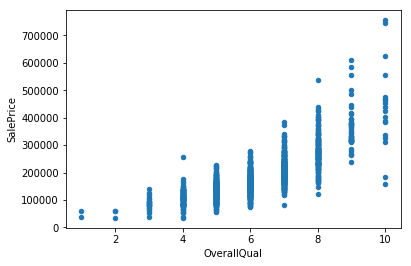

In [24]:
housing.plot.scatter('OverallQual', 'SalePrice');

Text(0.5,1,'SalePrice : None')

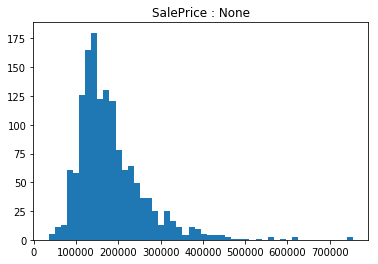

In [16]:
factor = 'SalePrice'
plt.hist(housing[factor], bins=50);
plt.title("{} : {}".format(factor, description[factor]))

# Lets start some sklearn

In [9]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
test_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
